In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [2]:
import glob
from PIL import Image

# Load images
images = glob.glob('../data/cryptopunks/*.jpg')

size_list = [32, 64, 128, 256]
for size in size_list:
    break
    # Resize image
    for image in images:
        with Image.open(image) as img:
            # Convert to RGB
            rgb_image = img.convert('RGB')
            # Resize image
            img_resized = rgb_image.resize((size, size), Image.LANCZOS)
            # Save image
            img_resized.save("../data/punks" + str(size) + "/" + image.split("/")[-1])

In [3]:
class Contrastive_Dataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir_lq = root_dir
        self.transform_hq = transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.ToTensor(),
        ])

        self.transform_lq = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.ToTensor(),
        ])

        self.images = glob.glob(root_dir + "/*.jpg")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        # Load image
        image = Image.open(self.images[idx])
        # Convert to RGB
        image = image.convert('RGB')
        # Transform image
        hq_image = self.transform_hq(image)
        lq_image = self.transform_lq(image)

        return hq_image, lq_image, self.images[idx].split("/")[-1]

In [4]:
loader = DataLoader(Contrastive_Dataset("../data/cryptopunks/"), batch_size=1, shuffle=True)
batch = next(iter(loader))

hq_image, lq_image, file_name = batch

print(hq_image.shape)

torch.Size([1, 3, 256, 256])


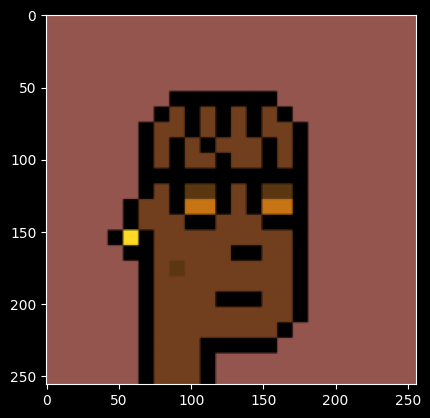

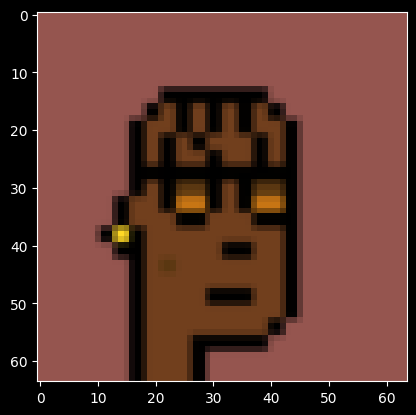

In [5]:
plt.imshow(hq_image[0].permute(1,2,0))
plt.show()
plt.imshow(lq_image[0].permute(1,2,0))
plt.show()
